# Chap2. 이동평균필터 (Moving Average Filter)

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# 선형적인 모델의 데이터 추출 함수 
def get_linear(gredient,t,*offset):
    if offset != ():
        output = gredient*t + np.random.normal(0,1) + offset
        
    elif offset == ():
        output = gredient*t + np.random.normal(0,1)
    return output


In [101]:
def MovingAvgFilter(size,data):  # 재귀적 평균필터의 식을 이용하여 함수 작성
    n = len(data)
    if n <= size :
        avg=np.mean(data)
        
    else:
        temp = data[n-size:n]
        avg = np.mean(temp)
    
    return avg

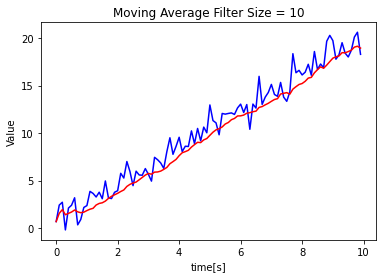

In [102]:
dt = 0.1
t = np.arange(0,10,dt) # 0에서 10초까지 dt 간격으로 데이터 생성
nSamples = []
size = 10

AvgSaved = [] #Plot하기위한 리스트 선언
queue = [] # 이동 평균 필터의 사이즈에 맞도록 Queue 자료 구조 이용

for i in range(t.shape[0]):
    
    nSamples.append(get_linear(2,t[i],0.5)) 
    
    avg=MovingAvgFilter(size,nSamples)
    
    AvgSaved.append(avg)

plt.title("Moving Average Filter Size = {}".format(size))
plt.ylabel("Value")
plt.xlabel("time[s]")
plt.plot(t,nSamples,'blue')
plt.plot(t,AvgSaved,'red')   

# 아래와 같이 작성할 수 있다

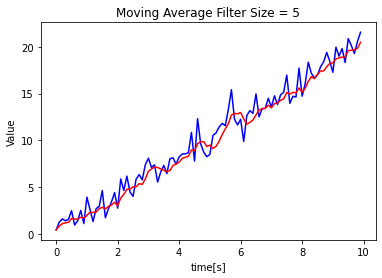

In [103]:
dt = 0.1
t = np.arange(0,10,dt) # 0에서 10초까지 dt 간격으로 데이터 생성
nSamples = np.zeros(t.shape)
size = 5

AvgSaved = [] #Plot하기위한 리스트 선언
queue = [] # 이동 평균 필터의 사이즈에 맞도록 Queue 자료 구조 이용

for i in range(t.shape[0]):
    
    nSamples[i] = get_linear(2,t[i],0.5)
    
    if len(queue) < size:
        queue.append(nSamples[i])
        avg = np.mean(queue)
        AvgSaved.append(avg)
        
    else :
        queue.pop(0)
        queue.append(nSamples[i])
        #print(len(queue))
        avg = np.mean(queue)
        AvgSaved.append(avg)

plt.title("Moving Average Filter Size = {}".format(size))
plt.ylabel("Value")
plt.xlabel("time[s]")
plt.plot(t,nSamples,'blue')
plt.plot(t,AvgSaved,'red')   